In [3]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import datetime
import matplotlib.pyplot as plt

In [4]:
from load_data import load_vel_files 

In [5]:
basepath = '/Users/tillmoritz/Desktop/Work/WBTSData/'

In [6]:
## create a list of all the paths in basepath and check if they contain the folder FINAL_ADCP_PRODUCTS
## if they do, add them to the list of paths to be loaded
dir_list = []
for root, dirs,files in os.walk(basepath):
    if 'FINAL_ADCP_PRODUCTS' and 'ladcp_velfiles' in dirs: 
        dir_list.append(os.path.join(root, 'ladcp_velfiles'))
    if 'FINAL_ADCP_PRODUCTS' and 'LADCP_velfiles' in dirs:
        dir_list.append(os.path.join(root, 'LADCP_velfiles'))
dir_list.sort()
### exclude the 2019_12 path since it is empty
for i in dir_list:
    if '2019_12' in i:
        dir_list.remove(i)


In [82]:
list = load_vel_files.load_vel_from_file(dir_list[1])

In [83]:
coords,_,_ = load_vel_files.create_coordinates(dir_list[1])

In [119]:
dir_list[1]

'/Users/tillmoritz/Desktop/Work/WBTSData/GC_2002_06/FINAL_ADCP_PRODUCTS/ladcp_velfiles'

In [122]:
ds_list = []
for n in [dir_list[0],dir_list[1]]:
    list = load_vel_files.load_vel_from_file(n)
    coords,_,_ = load_vel_files.create_coordinates(n)
    nc_list = []
    Lon = []
    Lat = []
    for i in range(len(list)):
        list[i].insert(loc=0, column='DATETIME', value=datetime.datetime.strptime(coords[i][2], '%Y-%m-%d %H:%M:%S'))
        Lat.append(float(coords[i][3]))
        Lon.append(float(coords[i][4]))
        nc_list.append(list[i].set_index(['DATETIME','DEPTH']).to_xarray())
    ds = xr.concat(nc_list, dim='DATETIME')
    ds.coords['LATITUDE'] = ('DATETIME', Lat)
    ds.coords['LONGITUDE'] = ('DATETIME', Lon)
    ds_list.append(ds)

/Users/tillmoritz/miniconda3/envs/WBTSdata/lib/python3.13/site-packages/pandas/core/generic.py:3331: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xarray.Dataset.from_dataframe(self)
/Users/tillmoritz/miniconda3/envs/WBTSdata/lib/python3.13/site-packages/pandas/core/generic.py:3331: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.dateti

In [126]:
xr.concat(ds_list, dim='DATETIME')

/var/folders/_j/gtdz594n13z3y8k5ml71sv3r0000gn/T/ipykernel_17517/1468576355.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xr.concat(ds_list, dim='DATETIME')
/var/folders/_j/gtdz594n13z3y8k5ml71sv3r0000gn/T/ipykernel_17517/1468576355.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

<xarray.Dataset> Size: 1MB
Dimensions:                     (DATETIME: 76, DEPTH: 546)
Coordinates:
  * DEPTH                       (DEPTH) float64 4kB 10.0 20.0 ... 5.46e+03
  * DATETIME                    (DATETIME) datetime64[ns] 608B 2001-05-01T04:...
    LATITUDE                    (DATETIME) float64 608B 26.52 27.03 ... 26.5
    LONGITUDE                   (DATETIME) float64 608B -74.24 -79.92 ... -73.58
Data variables:
    u_water_velocity_component  (DATETIME, DEPTH) float64 332kB -0.657 ... nan
    v_water_velocity_component  (DATETIME, DEPTH) float64 332kB -11.9 ... nan
    error_velocity              (DATETIME, DEPTH) float64 332kB 0.646 ... nan

In [7]:
ds_all = load_vel_files.create_complete_Dataset(dir_list)

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

In [13]:
ds_all

<xarray.Dataset> Size: 27MB
Dimensions:                     (DEPTH: 602, DATETIME: 1112)
Coordinates:
  * DEPTH                       (DEPTH) float64 5kB 5.0 10.0 ... 5.81e+03
  * DATETIME                    (DATETIME) datetime64[ns] 9kB 2001-05-01T03:1...
Data variables:
    LONGITUDE                   (DEPTH, DATETIME) float64 5MB nan nan ... nan
    LATITUDE                    (DEPTH, DATETIME) float64 5MB nan nan ... nan
    u_water_velocity_component  (DEPTH, DATETIME) float64 5MB nan nan ... nan
    v_water_velocity_component  (DEPTH, DATETIME) float64 5MB nan nan ... nan
    error_velocity              (DEPTH, DATETIME) float64 5MB nan nan ... nan
    Cast                        (DATETIME) float64 9kB 21.0 1.0 ... 30.0 26.0

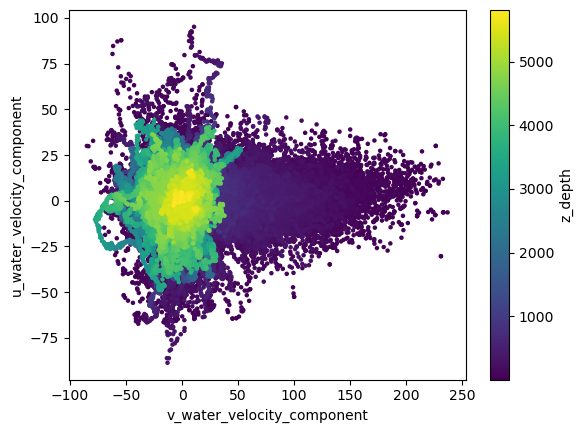

In [23]:
ds_all.plot.scatter(x='v_water_velocity_component', y='u_water_velocity_component',hue='z_depth',s=5,edgecolor='face')
plt.show()

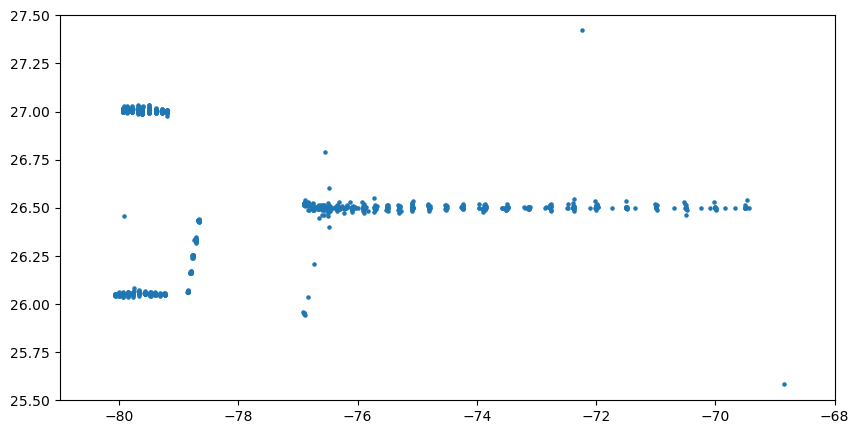

In [46]:
### plot all the measuremnt locations in a scatter plot
fig = plt.figure(figsize=(10,5))
plt.scatter(ds_all.Lon,ds_all.Lat,s=5)
plt.xlim(-81,-68)
plt.ylim(25.5,27.5)
plt.show()
